In [56]:
import pandas as pd
df = pd.read_csv(r'C:\work\Data_analyst\Test\Космос\TZ_GP.csv')

In [311]:
import seaborn as sns

In [57]:
df

,user_id,media_source,client_time,session_index,game_status,event_name,event_data
0,60c588d7b4d1b24b40531f29,organic,2021-06-05 07:23:06,1,"{""coins"":0,""freeRounds"":0,""freeUndo"":0,""freeWi...",appInstall,"{""device"":""Xiaomi POCO M2 Pro"",""graphicMemory""..."
1,60d34c7ab4d1b24b405324ac,organic,2021-06-05 16:33:26,1,"{""coins"":0,""freeRounds"":0,""freeUndo"":0,""freeWi...",appInstall,"{""device"":""samsung SM-J200G"",""graphicMemory"":2..."
2,60babef87c80da6a9442cb86,ad-traffic,2021-06-05 00:02:07,1,"{""coins"":0,""freeRounds"":0,""freeUndo"":0,""freeWi...",appInstall,"{""device"":""samsung SM-G781B"",""graphicMemory"":2..."
3,60bac0e912667e6a8d107731,ad-traffic,2021-06-05 00:04:29,1,"{""coins"":0,""freeRounds"":0,""freeUndo"":0,""freeWi...",appInstall,"{""device"":""samsung SM-T290"",""graphicMemory"":51..."
4,60babfb17c80da6a9442cb87,organic,2021-06-05 00:05:16,1,"{""coins"":0,""freeRounds"":0,""freeUndo"":0,""freeWi...",appInstall,"{""device"":""samsung SM-N960F"",""graphicMemory"":2..."
...,...,...,...,...,...,...,...
396094,60bb2f3912667e6a8d107757,organic,2021-06-12 11:52:41,54,"{""coins"":1174190,""freeRounds"":30,""freeUndo"":30...",transactionComplete,"{""inLevel"":false,""usdProceed"":68.1768094378241..."
396095,60bb2f3912667e6a8d107757,organic,2021-06-12 15:18:06,57,"{""coins"":7885,""freeRounds"":0,""freeUndo"":394,""f...",transactionComplete,"{""inLevel"":false,""usdProceed"":6.81001009386441..."
396096,60bb2f3912667e6a8d107757,organic,2021-06-12 15:18:30,57,"{""coins"":107885,""freeRounds"":0,""freeUndo"":394,...",transactionComplete,"{""inLevel"":false,""usdProceed"":13.6285433543043..."
396097,60bc090c12667e6a8d1077b8,organic,2021-06-12 22:48:26,2,"{""coins"":45274,""freeRounds"":0,""freeUndo"":3,""fr...",transactionComplete,"{""inLevel"":false,""usdProceed"":1.393,""productDe..."


In [13]:
# Посчитаем эффективность рекламной кампании с CPI = 1,8$
# Затраты на кампанию по привлечению уникальных (unique_user = 159) пользователей = 286.2$
CPI = 1.8 
unique_user = df.query('media_source =="ad-traffic"').user_id.nunique()
total_price_company = CPI*unique_user
total_price_company

286.2

In [447]:
# Сколько денег суммарно игроки потратили в игре  = 56.6$ 
money_install = df.query('media_source =="ad-traffic" & event_name == "transactionComplete"') \
    .event_data.str.extract(r'"usdProceed":(.*),')
money_install.columns = ['money']
money_install = money_install.astype({'money':'float'}).agg({'money':sum}).round(1)
# Вывод: потрачено 286$ , получено от игроков 56.6$ - кампания не эффективна. 
money_install

money    56.6
dtype: float64

In [121]:
df.query('event_name =="appInstall"').user_id.nunique()

452

In [122]:
df.query('event_name =="learning"').user_id.nunique()

446

In [394]:
# Посмотрим распределение игроков по уровням (до 30-го) для события старта игры (сколько игроков начали игру)

level_Start = df.query('event_name =="levelStart"').event_data.str.extract(r'"level":(\d*)')
level_Start.columns = ['level']
level_Start = level_Start.astype({'level':'int32'})
lvl_Start = level_Start.query('level < 31').value_counts().to_frame().reset_index().sort_values('level')

In [442]:
# Посмотрим распределение игроков по уровням (до 30-го) для события конца игры (сколько игроков закончили игру)

level_End = df.query('event_name =="levelEnd"').event_data.str.extract(r'"level":(\d*)')
level_End.columns = ['level']
level_End = level_End.astype({'level':'int32'})
lvl_End = level_End.query('level < 31').value_counts().to_frame().reset_index().sort_values('level')

In [396]:
# Узнаем разницу между количеством людей, которые начали игру и количеством людей, которые игру завершили
# Больше всего не завершили игру на 1,2,4,5, 24 уровнях
lvl_Start.columns = ['level', 'number_Start']
lvl_End.columns = ['level', 'number_End']
lvl_End['diff_Start-End'] = lvl_End['number_End'] - lvl_Start['number_Start']
lvl_End = lvl_End.merge(lvl_Start, how = 'inner', on = 'level')

In [397]:
lvl_End

,level,number_End,diff_Start-End,number_Start
0,1,438,-49,487
1,2,421,-19,440
2,3,408,-7,415
3,4,407,-3,412
4,5,393,-2,404
5,6,394,-3,397
6,7,404,-2,406
7,8,407,-5,408
8,9,406,-2,410
9,10,397,-7,395


Text(0.5, 1.0, 'Разница между начавшими и закончившими игру игроками ')

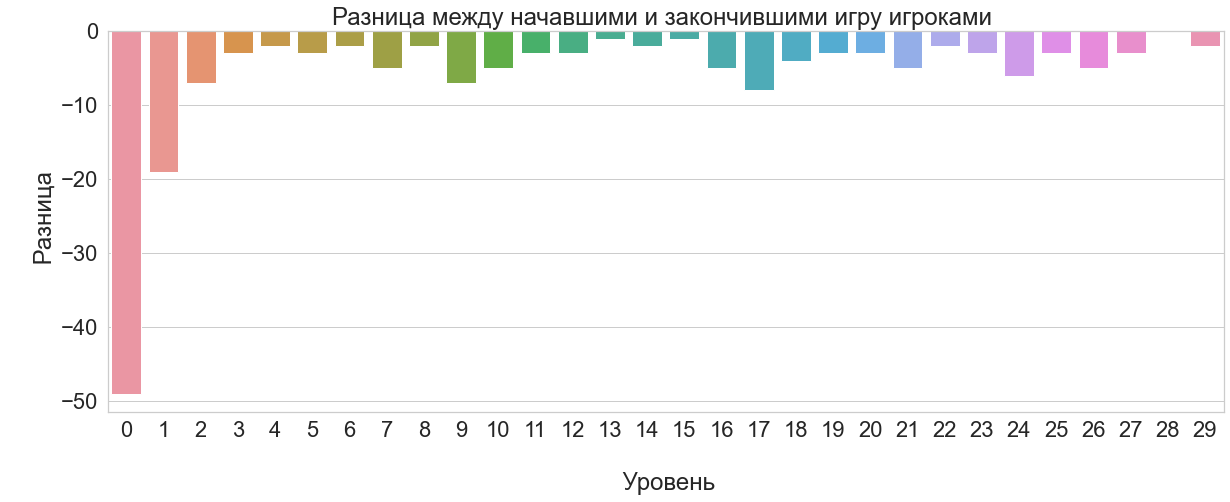

In [398]:
ax1 = sns.barplot(x="level", y="diff_Start-End", data=lvl_End)
ax1.set_ylabel('\n Разница')
ax1.set_xlabel('\n Уровень')
x_labels = [int(i) for i in ax.get_xticks()] 
ax1.set_xticklabels(x_labels)
ax1.set_title('Разница между начавшими и закончившими игру игроками ')

In [399]:
# Посмотрим разницу между количеством людей, завершившим текущий уровень, 
# и количеством людей, завершившим предыдущий уровень. Положительные значения - прибавилось количество игроков по сравнению с предыдущим уровнем.
lvl_End['shift_level_End'] = lvl_End['number_End'] - lvl_End['number_End'].shift(1)
lvl_End = lvl_End.fillna(0)


Text(0.5, 1.0, 'Разница между завершившими текущий уровень и предыдущий')

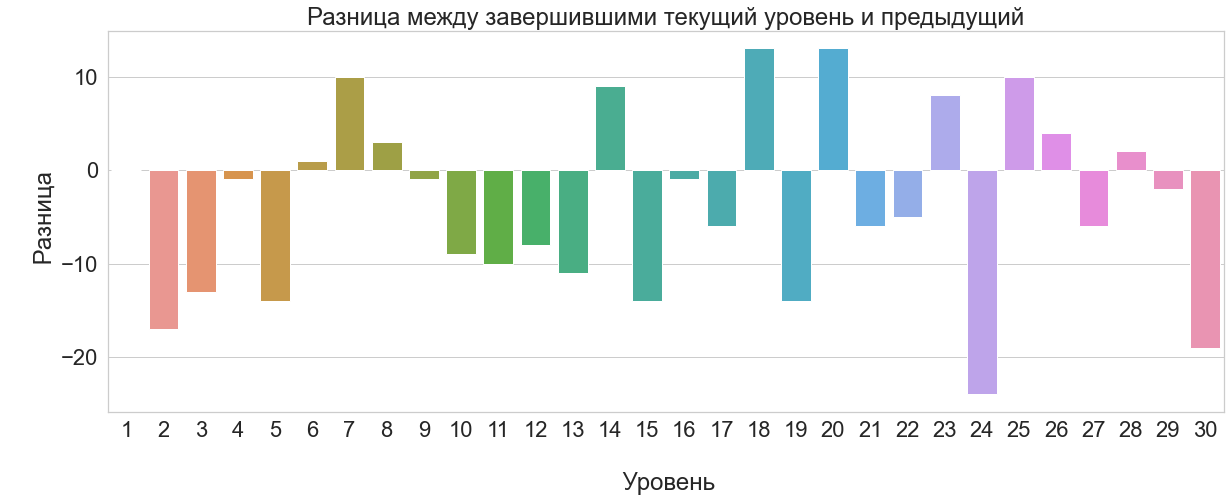

In [400]:
# Больше всего (по сравнению с предыдущим) отвалилось игроков на 24 уровне 

ax2 = sns.barplot(x='level', y='shift_level_End', data=lvl_End)
ax2.set_ylabel('\n Разница')
ax2.set_xlabel('\n Уровень')
ax2.set_title('Разница между завершившими текущий уровень и предыдущий')

In [401]:
lvl_End

,level,number_End,diff_Start-End,number_Start,shift_level_End
0,1,438,-49,487,0.0
1,2,421,-19,440,-17.0
2,3,408,-7,415,-13.0
3,4,407,-3,412,-1.0
4,5,393,-2,404,-14.0
5,6,394,-3,397,1.0
6,7,404,-2,406,10.0
7,8,407,-5,408,3.0
8,9,406,-2,410,-1.0
9,10,397,-7,395,-9.0
